In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import statsmodels.api as sm

In [4]:
from paths_usa import *

load results

In [12]:
results_USA_m = pd.read_csv(results_path + '/stats_USAm.csv',index_col=0)
results_BPA_m = pd.read_csv(results_path + '/stats_BPAm.csv',index_col=0)
results_BPA_d = pd.read_csv(results_path + '/stats_BPAd.csv',index_col=0)
results_BPA_h = pd.read_csv(results_path + '/stats_BPAh.csv',index_col=0)
results_NE_m = pd.read_csv(results_path + '/stats_NEm.csv',index_col=0)
results_TX_m = pd.read_csv(results_path + '/stats_TXm.csv',index_col=0)
results_TX_d = pd.read_csv(results_path + '/stats_TXd.csv',index_col=0)
results_TX_h = pd.read_csv(results_path + '/stats_TXh.csv',index_col=0)
results_IA_m = pd.read_csv(results_path + '/stats_IAm.csv',index_col=0)

load correlations of regions

In [78]:
cors = pd.read_csv(results_path + '/correlations_wind_regions.csv',index_col=0)

merge results and tidy

In [52]:
results = pd.concat([results_USA_m,results_BPA_m,results_BPA_d,results_BPA_h,results_NE_m,results_TX_m,results_TX_d,results_TX_h,results_IA_m])

results['param'] = results.index.values
results['time'] = sum([[x] * 4 for x in ['m','m','d','h','m','m','d','h','m']],[])
results['region'] = sum([[x] * 4 for x in ['USA','BPA','BPA','BPA','NE','TX','TX','TX','IA']],[])
results_tidy = pd.melt(results,id_vars=['param','time','region'],var_name='dataset').dropna()

prepare correlations

In [79]:
cors.loc[cors.type=='wind','type'] = 'w'
cors['dataset'] = cors.dataset.map({'mer':'MERRA2','era':'ERA5','mer_gwa':'MERRA2_GWA','era_gwa':'ERA5_GWA'})
cors['par'] = cors.type.str.cat(cors.year)

In [85]:
cors_tidy = cors.groupby(['region','dataset','par'])['mean_cor'].aggregate('mean').unstack().reset_index(['region','dataset'])

merge correlations and statistics

In [95]:
res_cor = results_tidy.merge(cors_tidy.reset_index(),how='left')

In [98]:
res_cor.head()

,param,time,region,dataset,value,index,w2001-2018,wp2017,wp2017-2018,wp2018
0,cor,m,USA,ERA5,0.439323,16.0,0.250742,0.203494,0.194539,0.185390
1,rmse,m,USA,ERA5,0.109389,16.0,0.250742,0.203494,0.194539,0.185390
2,mbe,m,USA,ERA5,-0.065163,16.0,0.250742,0.203494,0.194539,0.185390
3,avg,m,USA,ERA5,0.251238,16.0,0.250742,0.203494,0.194539,0.185390
4,cor,m,BPA,ERA5,0.781289,0.0,0.722507,0.755272,0.766426,0.774534


In [184]:
model.params[0]

0.21488753724977794

Text(0.5, 1.0, 'correlation: 1.059')

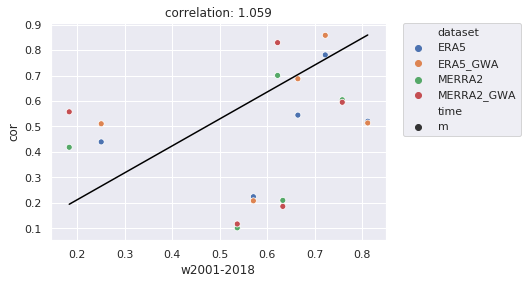

In [242]:
model = sm.OLS(res_cor.value[res_cor.param=='cor'], res_cor.loc[res_cor.param=='cor','w2001-2018']).fit()
xs = [res_cor.loc[(res_cor.param=='cor')&(res_cor.time=="m"),'w2001-2018'].min(),res_cor.loc[res_cor.param=='cor','w2001-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'w2001-2018':xs,'value':ys})

sns.lineplot(x="w2001-2018", y="value", data=line,color='black').set(ylabel='cor')
sns.scatterplot(x="w2001-2018", y="value", hue="dataset", style="time", data=res_cor[(res_cor.param=='cor')&(res_cor.time=="m")]).set(ylabel='cor')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

Text(0.5, 1.0, 'correlation: 0.215')

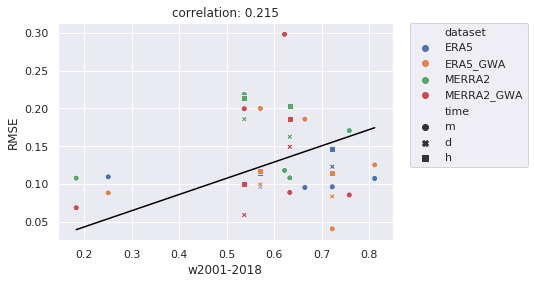

In [189]:
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','w2001-2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','w2001-2018'].min(),res_cor.loc[res_cor.param=='rmse','w2001-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'w2001-2018':xs,'value':ys})

sns.lineplot(x="w2001-2018", y="value", data=line,color='black').set(ylabel='RMSE')
sns.scatterplot(x="w2001-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse']).set(ylabel='RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

Text(0.5, 1.0, 'correlation: 0.217')

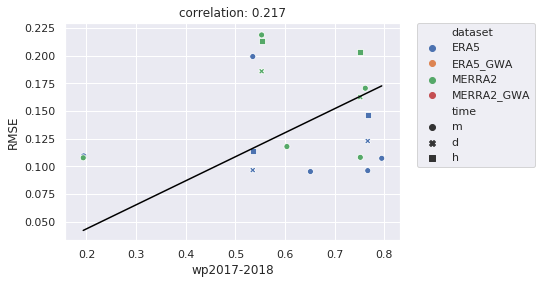

In [190]:
d = res_cor.loc[res_cor.param=='rmse',['value','wp2017-2018']].dropna()
model = sm.OLS(d.value,d['wp2017-2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2017-2018'].min(),res_cor.loc[res_cor.param=='rmse','wp2017-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017-2018':xs,'value':ys})

sns.lineplot(x="wp2017-2018", y="value", data=line,color='black').set(ylabel='RMSE')
sns.scatterplot(x="wp2017-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse']).set(ylabel='RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

Text(0.5, 1.0, 'correlation: 0.202')

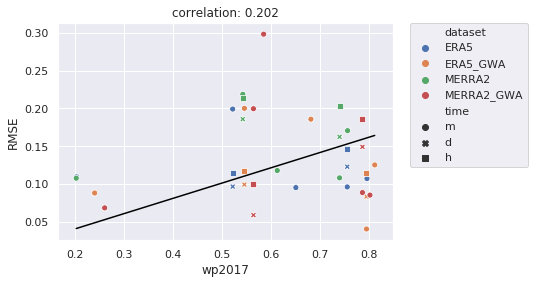

In [192]:
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','wp2017']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2017'].min(),res_cor.loc[res_cor.param=='rmse','wp2017'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017':xs,'value':ys})

sns.lineplot(x="wp2017", y="value", data=line,color='black').set(ylabel='RMSE')
sns.scatterplot(x="wp2017", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse']).set(ylabel='RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

Text(0.5, 1.0, 'correlation: 0.198')

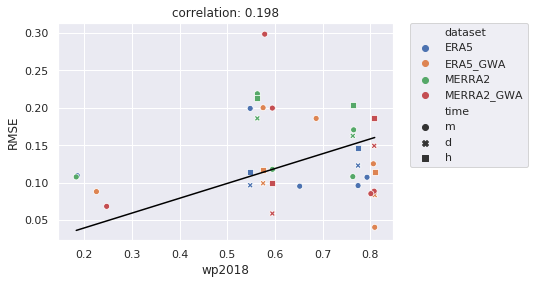

In [193]:
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','wp2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2018'].min(),res_cor.loc[res_cor.param=='rmse','wp2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2018':xs,'value':ys})

sns.lineplot(x="wp2018", y="value", data=line,color='black').set(ylabel='RMSE')
sns.scatterplot(x="wp2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse']).set(ylabel='RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12, 10), dpi=300)
plt.subplots_adjust(hspace=0.35,wspace=0.3)

# plot 1
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','w2001-2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','w2001-2018'].min(),res_cor.loc[res_cor.param=='rmse','w2001-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'w2001-2018':xs,'value':ys})

sns.lineplot(x="w2001-2018", y="value", data=line,color='black', ax=axs[0,0]).set(ylabel='RMSE')
sns.scatterplot(x="w2001-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse'], ax=axs[0,0]).set(ylabel='RMSE')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=3)#, borderaxespad=0.,ax = axs[0,0])
axs[0,0].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 2
d = res_cor.loc[res_cor.param=='rmse',['value','wp2017-2018']].dropna()
model = sm.OLS(d.value,d['wp2017-2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2017-2018'].min(),res_cor.loc[res_cor.param=='rmse','wp2017-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017-2018':xs,'value':ys})

sns.lineplot(x="wp2017-2018", y="value", data=line,color='black', ax=axs[0,1]).set(ylabel='RMSE')
sns.scatterplot(x="wp2017-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse'], ax=axs[0,1]).set(ylabel='RMSE')
axs[0,1].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 3
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','wp2017']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2017'].min(),res_cor.loc[res_cor.param=='rmse','wp2017'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017':xs,'value':ys})

sns.lineplot(x="wp2017", y="value", data=line,color='black', ax=axs[1,0]).set(ylabel='RMSE')
sns.scatterplot(x="wp2017", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse'], ax=axs[1,0]).set(ylabel='RMSE')
axs[1,0].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 4
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','wp2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2018'].min(),res_cor.loc[res_cor.param=='rmse','wp2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2018':xs,'value':ys})

sns.lineplot(x="wp2018", y="value", data=line,color='black', ax=axs[1,1]).set(ylabel='RMSE')
sns.scatterplot(x="wp2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse'], ax=axs[1,1]).set(ylabel='RMSE')
axs[1,1].title.set_text('correlation: ' + str(round(model.params[0],3)))


axs[0,0].get_legend().set_visible(False)
axs[0,1].get_legend().set_visible(False)
axs[1,0].get_legend().set_visible(False)
axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0.)

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12, 10), dpi=300)
plt.subplots_adjust(hspace=0.35,wspace=0.3)

# plot 1
model = sm.OLS(res_cor.value[res_cor.param=='cor'], res_cor.loc[res_cor.param=='cor','w2001-2018']).fit()
xs = [res_cor.loc[res_cor.param=='cor','w2001-2018'].min(),res_cor.loc[res_cor.param=='cor','w2001-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'w2001-2018':xs,'value':ys})

sns.lineplot(x="w2001-2018", y="value", data=line,color='black', ax=axs[0,0]).set(ylabel='cor')
sns.scatterplot(x="w2001-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='cor'], ax=axs[0,0]).set(ylabel='cor')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=3)#, borderaxespad=0.,ax = axs[0,0])
axs[0,0].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 2
d = res_cor.loc[res_cor.param=='cor',['value','wp2017-2018']].dropna()
model = sm.OLS(d.value,d['wp2017-2018']).fit()
xs = [res_cor.loc[res_cor.param=='cor','wp2017-2018'].min(),res_cor.loc[res_cor.param=='cor','wp2017-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017-2018':xs,'value':ys})

sns.lineplot(x="wp2017-2018", y="value", data=line,color='black', ax=axs[0,1]).set(ylabel='cor')
sns.scatterplot(x="wp2017-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='cor'], ax=axs[0,1]).set(ylabel='cor')
axs[0,1].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 3
model = sm.OLS(res_cor.value[res_cor.param=='cor'], res_cor.loc[res_cor.param=='cor','wp2017']).fit()
xs = [res_cor.loc[res_cor.param=='cor','wp2017'].min(),res_cor.loc[res_cor.param=='cor','wp2017'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017':xs,'value':ys})

sns.lineplot(x="wp2017", y="value", data=line,color='black', ax=axs[1,0]).set(ylabel='cor')
sns.scatterplot(x="wp2017", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='cor'], ax=axs[1,0]).set(ylabel='cor')
axs[1,0].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 4
model = sm.OLS(res_cor.value[res_cor.param=='cor'], res_cor.loc[res_cor.param=='cor','wp2018']).fit()
xs = [res_cor.loc[res_cor.param=='cor','wp2018'].min(),res_cor.loc[res_cor.param=='cor','wp2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2018':xs,'value':ys})

sns.lineplot(x="wp2018", y="value", data=line,color='black', ax=axs[1,1]).set(ylabel='cor')
sns.scatterplot(x="wp2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='cor'], ax=axs[1,1]).set(ylabel='cor')
axs[1,1].title.set_text('correlation: ' + str(round(model.params[0],3)))


axs[0,0].get_legend().set_visible(False)
axs[0,1].get_legend().set_visible(False)
axs[1,0].get_legend().set_visible(False)
axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0.)